# Clasificación y Regresión Lineal

### Integrantes

| Nombres                              |
| ------------------------------------ |
| Mónica Gabriela Cabañas Meléndez     |
| Víctor Daniel Peraza Bolaños         |

## Importación de liberías

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression
import seaborn as sns

## Clasificación lineal

In [3]:
# Load the digits dataset
digits = load_digits()
print(digits.data.shape)

(1797, 64)


### Análisis descriptivo de los datos

La librería de sklearn nos ofrece el dataset de dígitos que se utilizará en este trabajo para entrenar los modelos. Este al ser obtenido a través de la librería ofrece varios funcionalidad como la obtención de las imágenes de los dígitos, la matriz de muestras con sus características y el vector de objetivos. 

En el siguiente código podemos observar las imágenes que representan los dígitos del 0 al 9. En cada imagen se puede observar lo siguiente: 
* Las imágenes están constituidas por 64 pixeles cada una.
* Los pixeles más claros indican la forma del número mientras que los pixeles más oscuros representan el fondo de la imagen.
* En las imágenes pueden observarse colores distintos del negro y el blanco por lo tanto no solo hay pixeles blanco y negro si no varios que se ven representados por distintos tonos del color gris.

<Figure size 640x480 with 0 Axes>

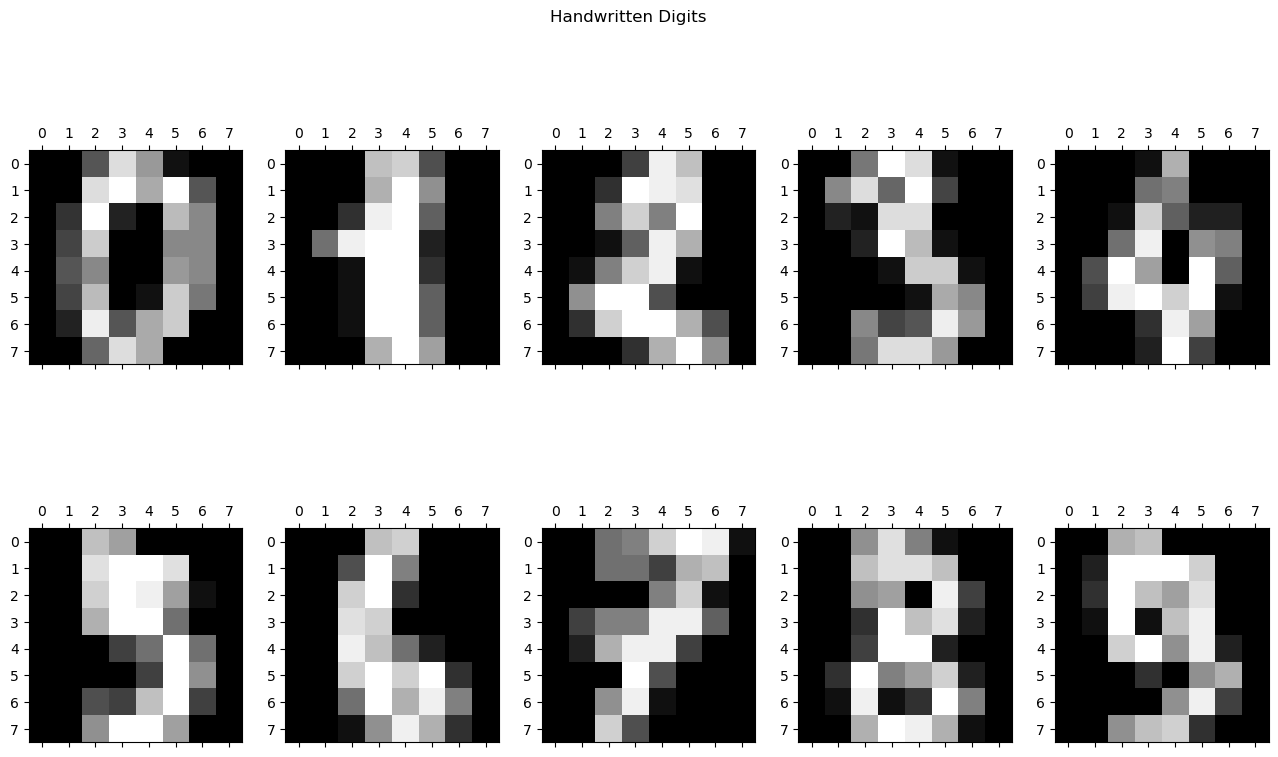

In [4]:
# Display the first digit
plt.gray()
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,9))
fig.suptitle('Handwritten Digits')
for i in range(2): 
    for j in range(5):
        if(i==0):
            axs[i,j].matshow(digits.images[j])
        else:
            axs[i,j].matshow(digits.images[j+5])
plt.show()

En la siguiente figura se puede observar que las muestras de dígitos no siguen un patrón con respecto a la posición en la matriz. Por ejemplo, en un principio los dígitos en las posiciones múltiplos de 10 se encuentra la figura del dígito 0, sin embargo, luego de ciertas iteraciones los dígitos empiezan a cambiar a otras instancias distintas de 0.

<Figure size 640x480 with 0 Axes>

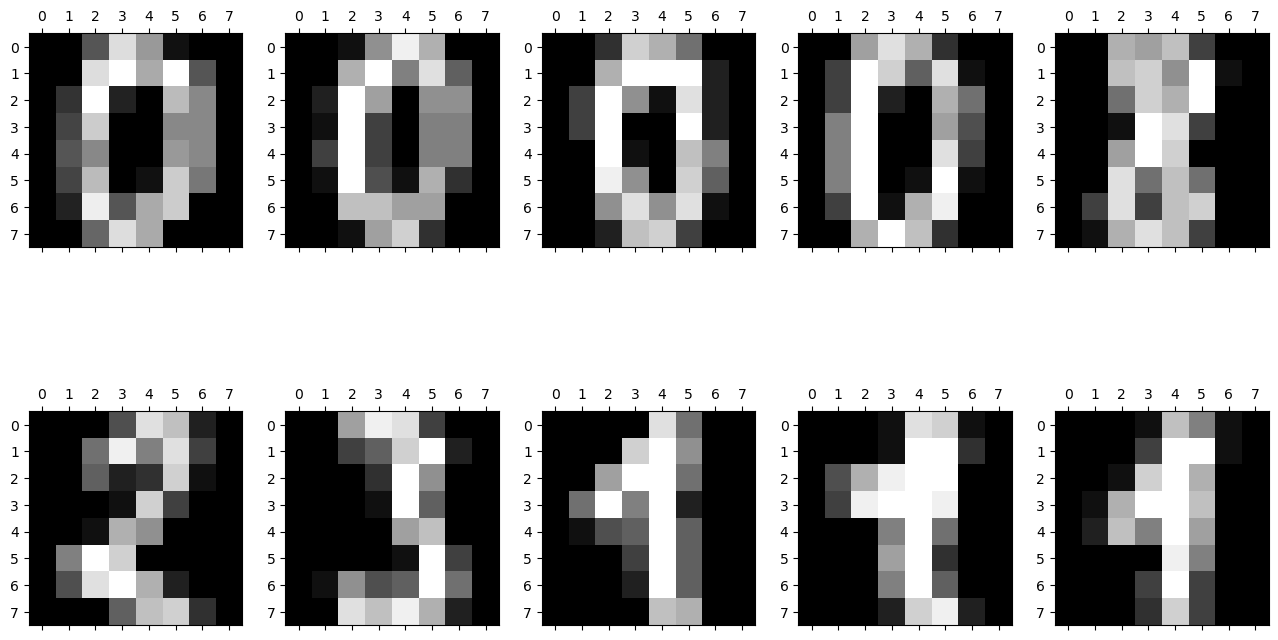

In [5]:
plt.gray()
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,9))
for i in range(2):
    for j in range(5):
        if(i==0):
            axs[i,j].matshow(digits.images[j*10])
        else:
            axs[i,j].matshow(digits.images[(j+5)*10])
plt.show()

Como observamos anteriormente, los digitos están representados por imagenes de 64 pixeles que describirán la forma del dígito en especifico; esto se puede traducir a 64 características en las que cada característica contendrá el valor del pixel. 

A continuación se presenta la matriz de muestras $X$ con sus 64 características y su respectivo objetivo.

In [6]:
digits_df = load_digits(as_frame=True)
digits_df.frame.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


Con el método describe() que poseen los Dataframe de pandas, se pueden computar fácilmente mediciones estadisticas como:

* La cantidad total de datos
* La media de los valores
* La desviación estándar
* Valores minímos y máximos, así como los cuartiles de los datos

Cada uno de estos valores es calculado por cada una de las columnas o características que componene el dataset


In [7]:
digits_df.frame.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


Observando las medidas de la media y la desviación estándar proporcionadas, se puede observar lo siguiente:

* La desviación estándar dentro de cada característica indica que los datos no tienden a estar muy dispersos entre ellos, pues puede observarse que el valor máximo de la desviación es 5.9 y el menor es 0.023
* El estudio de valores máximos y mínimos nos muestra que dentro de las categorías no existen valores negativos, pues el menor valor es 0 en todas

In [8]:
digits_df.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

Finalmente, se puede observar que todas las columnas de caracteristicas dentro del dataset de tipo flotante a excepción de la columna target que representa el digito representado por el grupo de pixeles, es decir números decimales, lo que implica que no necesitaremos ninguna conversión de tipos datos entre ellas ni tampoco realizar procesos de codificación para datos cualitativos

## Preprocesamiento de los datos

Lo primero a realizar para usar los clasificadores, será reducir de matrices de 8x8 a vectores de 64 elementos, lo que permite reducir el arreglo original de 3D a 2D, manteniendo las características.

Esto permite reducir la complejidad para los clasificadores y asegurar un mejor desempeño, pues trabajan mejor con menos dimensiones y se reduce los efectos del curse of dimentionality. Ahora, a cada linea le corresponde una imagen y a cada columna un pixel.

In [9]:
X = digits.images.reshape(len(digits.images),-1)
y = digits.target

### Estandarización de datos

Una vez hecho esto, se procedera a estándarizar los datos, para que los outliers no afecten demasidado el modelo y poder tener los datos escalados de una forma que al evaluarlos se produzca el menor sesgo posible.

La estándarización usada será la distrbución Z, la cual sigue la fórmula:

Donde:

* x es el valor actual
* u es la media del conjnunto de datos actuales
* s es la desviación estándar

En Scikit Learn, esta viene dada por la clase StandardScaler

In [10]:
standarized_digits = StandardScaler().fit_transform(X=digits.data)
pd.DataFrame(standarized_digits, columns=digits_df.data.columns)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


### División de datos

A continuación se separarán los datos en bloques de entrenamiento y de testing para poder evaluar el rendimiento de los modelos.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(standarized_digits, digits.target, test_size=0.2, random_state=42)

### KNN

En la siguiente sección, se encuentra la implementación de KNN utilizando la líbreria Scikit Learn

In [11]:
# Funciones especificas para KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [12]:
# Declaracion del clasificador KNN

knn = KNeighborsClassifier()

KNN es un clasificador que tiene los siguientes hyper párametros:

- **n_neighbors**, el cual indica la cantidad de puntos adyacentes o "vecinos" serán consultados o comparados para poder determinar a que clase asignar el elemento evaluado actualmente
- **weights**, que indica la función de peso a usar en el modelo, los valores que se usarán serán uniform y distance:
    - uniform: Todos los puntos poseen el mismo peso
    - distance: Los puntos poseen un peso igual a la inversa de su distancia. Esto afectará en que los puntos más cercanos a un elemento actual poseerán mayor influencia que los que se encuentren más lejos
- **p**: dado que se emplea la métrica de Minkowski, $ D(\mathbf{x}, \mathbf{y}) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}} $
, el valor de \( p \) determina el tipo de distancia:
    - \( p = 1 \): Distancia de Manhattan
    - \( p = 2 \): Distancia euclídea


Para poder encontrar el mejor rendimiento de KNN, se debe de buscar la mejor combinación de estos hyper parámetros posibles. Esto, da lugar a una búsqueda exhaustiva manualmente, sin embargo scikit learn cuenta con la utilidad GridSearchCV, el cual recibe un arreglo con los diferentes hyper parámetros y el método que los usará, para luego proceder a evaluar las diferentes combinaciones de estos valores hasta encontrar aquellos que obtengan los mejores resultados, empleando a su vez Cross Validation o validación cruzada para evitar generar overfitting al evaluar.

Para poder evaluar el mejor resultado de los parámetros, utiliza la medida indicada, en nuestor caso será accuracy, que indica la exactitud con que cada uno de los elementos fue clasificado de forma correcta. GridSearchCV comparará las diferentes medidas obtenidas de las múltiples combinaciones y retornará los parámetros que tengan la medición de exactitud más alta.

Además, puede agregarse el argumento cv, que le indica la cantidad de particiones a realizar en la data para entrenar el modelo y realizar validación cruzada con los datos provistos.

In [15]:
# Using GridSearchCV to find the best hypermparameters
parameters = {
    'n_neighbors':[1,3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'p': [2]
}
grid =  GridSearchCV(knn,parameters,cv=5,scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11], 'p': [2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Utilizando el atributo _cv_results__, se puede generar una tabla reporte que permite conocer los valores obtenidos al evaluar las diferentes combinaciones de parámetros realizadas por GridSearchCV

In [16]:
analysis_grid = pd.DataFrame(grid.cv_results_)
analysis_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001111,0.000147,0.019177,0.024185,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.958333,0.968750,0.968641,0.979094,0.958188,0.966601,0.007797,9
1,0.000901,0.000161,0.003653,0.000941,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.958333,0.968750,0.968641,0.979094,0.958188,0.966601,0.007797,9
2,0.000961,0.000072,0.003672,0.001493,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",0.975694,0.972222,0.965157,0.986063,0.972125,0.974252,0.006826,2
3,0.000725,0.000146,0.002965,0.000384,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.979167,0.972222,0.972125,0.986063,0.965157,0.974947,0.007108,1
4,0.000679,0.000079,0.002838,0.000261,5,2,uniform,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.986111,0.965278,0.958188,0.986063,0.968641,0.972856,0.011318,6
5,0.000728,0.000139,0.003265,0.000310,5,2,distance,"{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}",0.986111,0.965278,0.958188,0.986063,0.975610,0.974250,0.011141,3
6,0.000865,0.000092,0.003040,0.000204,7,2,uniform,"{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}",0.986111,0.961806,0.961672,0.989547,0.965157,0.972859,0.012335,5
7,0.000603,0.000062,0.002730,0.000239,7,2,distance,"{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}",0.986111,0.968750,0.958188,0.986063,0.968641,0.973551,0.010931,4
8,0.000867,0.000246,0.003221,0.000593,9,2,uniform,"{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}",0.972222,0.961806,0.958188,0.982578,0.961672,0.967293,0.008973,8
9,0.000678,0.000186,0.002952,0.000560,9,2,distance,"{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}",0.975694,0.961806,0.965157,0.982578,0.961672,0.969382,0.008351,7


Sin embargo, para simplificar el análisis se puede utilizar el atributo best_params para obtener a los parámetros encontrados como mejores por la función

In [17]:
grid.best_params_
print(
    f"Mejores parámetros encontrados para KNN \n"
    f"Cantidad de vecinos {grid.best_params_['n_neighbors']} \n"
    f"Peso ideal para knn: {grid.best_params_['weights']} \n"
    f"Valor ideal de p: {grid.best_params_['p']} \n"
)

Mejores parámetros encontrados para KNN 
Cantidad de vecinos 3 
Peso ideal para knn: distance 
Valor ideal de p: 2 



Con los parámetros obtenidos previamente, vamos a ejecturar el algoritmo de KNN manualmente para realizar una análisis más a profundidad y evaluar su rendimiendo más detenidamente

In [18]:
n_neighbors = grid.best_params_['n_neighbors']
weight = grid.best_params_['weights']
p = grid.best_params_['p']
knn.fit(X_train,y_train)

KNeighborsClassifier()

Para el análisis de resultados, tanto de KNN como de los siguientes clasificadores, usaremos las siguientes herramientas:

- Informe de Clasificación, utilidad provista por scikit learn a través de sklearn.metrics, permite obtener un reporte que brinda información de la precisión, recall y el valor de f1-score obtenido por el clasificador
    - **precision**, mide el porcentaje de elementos correctamente identificados en la clase a la que pertenecen, del total de elementos como pertenecientes a dicha clase, se calcula como $\frac{VerdaderosPositivos}{VerdaderosPositivos + FalsosPositivos}$
    - **recall**, mide el porcentaje de elementos correctamente identificados como pertenecientes a su clase, del total de elementos predichos $ \frac{VerdaderosPositivos}{VerdaderosPositivos + FalsosNegativos}$
    - **f1-score**, es la media ármonica entre precision y accuracy
- Matriz de confusión, permite visualizar como se comporto el modelo al clasificar los diferentes elementos, mostando la cantidad en la cual este asigno correctamente y cuantos no lo fueron, indicando a su vez el valor real y el valor asignado a dicho elemento. La diagonal indica el éxito al clasificar un elemento, al ser la intersección entre el valor real y el asignado.

In [19]:
pred = knn.predict(X_test)
print(
    f"Classification report for classifier {knn}:\n"
    f"{classification_report(y_test,pred)}\n"
)

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      1.00      0.98        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360




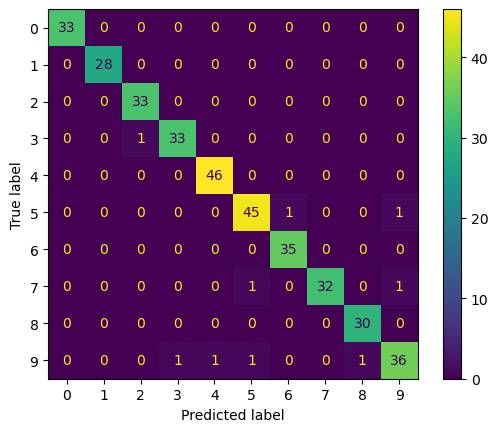

In [20]:
matrix = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=knn.classes_)
disp.plot()

### Regresión logística

A continuación se desarrollan 10 clasificadores diferentes (porque se tienen 10 clases) implementando la función de decisión de clase: escogiendo como clase la salida correspondiente al clasificador con mayor probabilidad.

Para ello, se convierten los datos del vector $Y$. Por ejemplo, en el primer clasificador que corresponde al clasificador de dígitos $0$, todos los dígitos diferentes a $0$ se clasificarán como el dígito $1$.

En los siguientes clasificadores se sigue la misma lógica con la única diferencia de que todos los dígitos diferentes al que se evalúa en el respectivo clasificador se clasificarán como $0$.

In [21]:
models = []
y_tests = []

# Classifier for identifying the digit 0
# We will create a new target variable that is 0 when the digit is 0 and 1 otherwise
y_train_0 = (y_train != 0).astype(int)
y_tests.append((y_test != 0).astype(int))
# Train the classifier
models.append(LogisticRegression(random_state=42).fit(X_train, y_train_0))

probabilities = models[0].predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '1'])
probabilities_df['target'] = y_tests[0]
probabilities_df['predicted'] = models[0].predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(10)

,0,1,target,predicted,real
0,2.784627e-04,0.999722,1,1,6
1,1.393200e-03,0.998607,1,1,9
2,1.700980e-07,1.000000,1,1,3
3,9.966439e-04,0.999003,1,1,7
4,7.360739e-06,0.999993,1,1,2
5,7.920234e-07,0.999999,1,1,1
6,1.957589e-04,0.999804,1,1,5
7,1.132861e-04,0.999887,1,1,2
8,1.226149e-06,0.999999,1,1,5
9,2.044513e-08,1.000000,1,1,2


In [22]:
print(
    f"Classification report for classifier {0}:\n"
    f"{classification_report(y_tests[0],models[0].predict(X_test))}\n"
)

Classification report for classifier 0:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      1.00      1.00       327

    accuracy                           1.00       360
   macro avg       1.00      0.98      0.99       360
weighted avg       1.00      1.00      1.00       360




In [24]:
# Classifier for identifying the digit 1
# We will create a new target variable that is 1 when the digit is 1 and 0 otherwise
y_train_1 = (y_train == 1).astype(int)
y_tests.append((y_test == 1).astype(int))
# Train the classifier
models.append(LogisticRegression(random_state=42).fit(X_train, y_train_1))

probabilities = models[1].predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '1'])
probabilities_df['target'] = y_tests[1]
probabilities_df['predicted'] = models[1].predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(10)

,0,1,target,predicted,real
0,0.999987,1.254637e-05,0,0,6
1,0.999999,9.375449e-07,0,0,9
2,0.999999,6.257312e-07,0,0,3
3,0.999960,4.044120e-05,0,0,7
4,0.999998,1.526590e-06,0,0,2
5,0.081580,9.184198e-01,1,1,1
6,0.999931,6.859354e-05,0,0,5
7,0.999935,6.478271e-05,0,0,2
8,0.999999,1.354106e-06,0,0,5
9,1.000000,1.270228e-09,0,0,2


In [25]:
print(
    f"Classification report for classifier {1}:\n"
    f"{classification_report(y_tests[1],models[1].predict(X_test))}\n"
)

Classification report for classifier 1:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       332
           1       0.88      1.00      0.93        28

    accuracy                           0.99       360
   macro avg       0.94      0.99      0.96       360
weighted avg       0.99      0.99      0.99       360




In [26]:
# Classifier for identifying the digit 2
# We will create a new target variable that is 2 when the digit is 2 and 0 otherwise
y_train_2 = np.where(y_train == 2, 2, 0)
y_tests.append(np.where(y_test == 2, 2, 0))

# Train the classifier
models.append(LogisticRegression(random_state=42).fit(X_train, y_train_2))

# Evaluate the classifier
probabilities = models[2].predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '1'])
probabilities_df['target'] = y_tests[2]
probabilities_df['predicted'] = models[2].predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(10)

,0,1,target,predicted,real
0,0.999997,3.257713e-06,0,0,6
1,0.999999,1.121999e-06,0,0,9
2,0.999939,6.071941e-05,0,0,3
3,0.999895,1.054203e-04,0,0,7
4,0.148135,8.518653e-01,2,2,2
5,0.494572,5.054275e-01,0,2,1
6,0.999998,2.431200e-06,0,0,5
7,0.097767,9.022329e-01,2,2,2
8,1.000000,4.203179e-07,0,0,5
9,0.006546,9.934535e-01,2,2,2


In [27]:
print(
    f"Classification report for classifier {2}:\n"
    f"{classification_report(y_tests[2],models[2].predict(X_test))}\n"
)

Classification report for classifier 2:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       327
           2       0.94      1.00      0.97        33

    accuracy                           0.99       360
   macro avg       0.97      1.00      0.98       360
weighted avg       0.99      0.99      0.99       360




In [28]:
# Classifier for identifying the digit 3
# We will create a new target variable that is 3 when the digit is 3 and 0 otherwise
y_train_3 = np.where(y_train == 3, 3, 0)
y_tests.append(np.where(y_test == 3, 3, 0))

# Train the classifier
models.append(LogisticRegression(random_state=42).fit(X_train, y_train_3))

# Evaluate the classifier
probabilities = models[3].predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '3'])
probabilities_df['target'] = y_tests[3]
probabilities_df['predicted'] = models[3].predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(10)

,0,3,target,predicted,real
0,0.999999,8.136240e-07,0,0,6
1,0.999631,3.690614e-04,0,0,9
2,0.000346,9.996538e-01,3,3,3
3,0.999894,1.064981e-04,0,0,7
4,0.956580,4.342031e-02,0,0,2
5,1.000000,3.016210e-09,0,0,1
6,0.999113,8.867724e-04,0,0,5
7,0.881321,1.186786e-01,0,0,2
8,0.999911,8.920519e-05,0,0,5
9,0.620206,3.797938e-01,0,0,2


In [29]:
print(
    f"Classification report for classifier {3}:\n"
    f"{classification_report(y_tests[3],models[3].predict(X_test))}\n"
)

Classification report for classifier 3:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       326
           3       0.94      0.94      0.94        34

    accuracy                           0.99       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.99      0.99      0.99       360




In [30]:
# Classifier for identifying the digit 4
# We will create a new target variable that is 4 when the digit is 4 and 0 otherwise
y_train_4 = np.where(y_train == 4, 4, 0)
y_tests.append(np.where(y_test == 4, 4, 0))

# Train the classifier
models.append(LogisticRegression(random_state=42).fit(X_train, y_train_4))

# Evaluate the classifier
probabilities = models[4].predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '4'])
probabilities_df['target'] = y_tests[4]
probabilities_df['predicted'] = models[4].predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(10)

,0,4,target,predicted,real
0,0.999935,6.473550e-05,0,0,6
1,0.999586,4.137359e-04,0,0,9
2,1.000000,3.149690e-09,0,0,3
3,0.999964,3.616839e-05,0,0,7
4,1.000000,3.096371e-11,0,0,2
5,0.999797,2.032033e-04,0,0,1
6,0.999999,1.112351e-06,0,0,5
7,0.999999,1.349360e-06,0,0,2
8,0.999888,1.116772e-04,0,0,5
9,1.000000,2.996728e-07,0,0,2


In [31]:
print(
    f"Classification report for classifier {4}:\n"
    f"{classification_report(y_tests[4],models[4].predict(X_test))}\n"
)

Classification report for classifier 4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           4       1.00      1.00      1.00        46

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360




In [32]:
# Classifier for identifying the digit 5
# We will create a new target variable that is 5 when the digit is 5 and 0 otherwise
y_train_5 = np.where(y_train == 5, 5, 0)
y_tests.append(np.where(y_test == 5, 5, 0))

# Train the classifier
models.append(LogisticRegression(random_state=42).fit(X_train, y_train_5))

# Evaluate the classifier
probabilities = models[5].predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '5'])
probabilities_df['target'] = y_tests[5]
probabilities_df['predicted'] = models[5].predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(10)

,0,5,target,predicted,real
0,0.999846,0.000154,0,0,6
1,0.532920,0.467080,0,0,9
2,0.999537,0.000463,0,0,3
3,0.996511,0.003489,0,0,7
4,0.999848,0.000152,0,0,2
5,0.991469,0.008531,0,0,1
6,0.000415,0.999585,5,5,5
7,0.999996,0.000004,0,0,2
8,0.002964,0.997036,5,5,5
9,0.999558,0.000442,0,0,2


In [33]:
print(
    f"Classification report for classifier {5}:\n"
    f"{classification_report(y_tests[5],models[5].predict(X_test))}\n"
)

Classification report for classifier 5:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       313
           5       0.96      0.91      0.93        47

    accuracy                           0.98       360
   macro avg       0.97      0.95      0.96       360
weighted avg       0.98      0.98      0.98       360




In [34]:
# Classifier for identifying the digit 6|
# We will create a new target variable that is 6 when the digit is 6 and 0 otherwise
y_train_6 = np.where(y_train == 6, 6, 0)
y_tests.append(np.where(y_test == 6, 6, 0))

# Train the classifier
models.append(LogisticRegression(random_state=42).fit(X_train, y_train_6))

# Evaluate the classifier
probabilities = models[6].predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '6'])
probabilities_df['target'] = y_tests[6]
probabilities_df['predicted'] = models[6].predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(10)

,0,6,target,predicted,real
0,0.007025,9.929752e-01,6,6,6
1,1.000000,9.895282e-10,0,0,9
2,0.999994,6.193103e-06,0,0,3
3,0.999999,9.845437e-07,0,0,7
4,0.999925,7.491450e-05,0,0,2
5,0.996418,3.582440e-03,0,0,1
6,0.999991,9.301746e-06,0,0,5
7,0.999996,3.903200e-06,0,0,2
8,0.999916,8.362729e-05,0,0,5
9,1.000000,2.251775e-08,0,0,2


In [35]:
print(
    f"Classification report for classifier {6}:\n"
    f"{classification_report(y_tests[6],models[6].predict(X_test))}\n"
)

Classification report for classifier 6:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           6       1.00      0.97      0.99        35

    accuracy                           1.00       360
   macro avg       1.00      0.99      0.99       360
weighted avg       1.00      1.00      1.00       360




In [36]:
# Classifier for identifying the digit 7
# We will create a new target variable that is 7 when the digit is 7 and 0 otherwise
y_train_7 = np.where(y_train == 7, 7, 0)
y_tests.append(np.where(y_test == 7, 7, 0))

# Train the classifier
models.append(LogisticRegression(random_state=42).fit(X_train, y_train_7))

# Evaluate the classifier
probabilities = models[7].predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '7'])
probabilities_df['target'] = y_tests[7]
probabilities_df['predicted'] = models[7].predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(10)

,0,7,target,predicted,real
0,0.999886,1.135827e-04,0,0,6
1,0.999968,3.165516e-05,0,0,9
2,0.999849,1.507200e-04,0,0,3
3,0.182639,8.173605e-01,7,7,7
4,0.999999,8.206875e-07,0,0,2
5,1.000000,9.173672e-13,0,0,1
6,0.999865,1.351437e-04,0,0,5
7,0.999922,7.792379e-05,0,0,2
8,0.995161,4.839063e-03,0,0,5
9,0.993476,6.523532e-03,0,0,2


In [37]:
print(
    f"Classification report for classifier {7}:\n"
    f"{classification_report(y_tests[7],models[7].predict(X_test))}\n"
)

Classification report for classifier 7:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           7       1.00      0.97      0.99        34

    accuracy                           1.00       360
   macro avg       1.00      0.99      0.99       360
weighted avg       1.00      1.00      1.00       360




In [38]:
# Classifier for identifying the digit 8
# We will create a new target variable that is 8 when the digit is 8 and 0 otherwise
y_train_8 = np.where(y_train == 8, 8, 0)
y_tests.append(np.where(y_test == 8, 8, 0))

# Train the classifier
models.append(LogisticRegression(random_state=42).fit(X_train, y_train_8))

# Evaluate the classifier
probabilities = models[8].predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '8'])
probabilities_df['target'] = y_tests[8]
probabilities_df['predicted'] = models[8].predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(10)

,0,8,target,predicted,real
0,0.999346,0.000654,0,0,6
1,0.999744,0.000256,0,0,9
2,0.992875,0.007125,0,0,3
3,0.999982,0.000018,0,0,7
4,0.997726,0.002274,0,0,2
5,0.986634,0.013366,0,0,1
6,0.997636,0.002364,0,0,5
7,0.999997,0.000003,0,0,2
8,0.999994,0.000006,0,0,5
9,0.999999,0.000001,0,0,2


In [39]:
print(
    f"Classification report for classifier {8}:\n"
    f"{classification_report(y_tests[8],models[8].predict(X_test))}\n"
)

Classification report for classifier 8:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       330
           8       0.83      0.80      0.81        30

    accuracy                           0.97       360
   macro avg       0.90      0.89      0.90       360
weighted avg       0.97      0.97      0.97       360




In [40]:
# Classifier for identifying the digit 9
# We will create a new target variable that is 9 when the digit is 9 and 0 otherwise
y_train_9 = np.where(y_train == 9, 9, 0)
y_tests.append(np.where(y_test == 9, 9, 0))

# Train the classifier
models.append(LogisticRegression(random_state=42).fit(X_train, y_train_9))

# Evaluate the classifier
probabilities = models[9].predict_proba(X_test)
probabilities_df = pd.DataFrame(probabilities, columns=['0', '9'])
probabilities_df['target'] = y_tests[9]
probabilities_df['predicted'] = models[9].predict(X_test)
probabilities_df['real'] = y_test
probabilities_df.head(10)

,0,9,target,predicted,real
0,0.999284,7.163400e-04,0,0,6
1,0.010958,9.890419e-01,9,9,9
2,0.997280,2.719989e-03,0,0,3
3,0.815110,1.848895e-01,0,0,7
4,0.999996,3.518850e-06,0,0,2
5,0.999956,4.351728e-05,0,0,1
6,0.999598,4.024326e-04,0,0,5
7,0.999445,5.549131e-04,0,0,2
8,1.000000,3.992051e-07,0,0,5
9,1.000000,6.860817e-13,0,0,2


In [41]:
print(
    f"Classification report for classifier {9}:\n"
    f"{classification_report(y_tests[9],models[9].predict(X_test))}\n"
)

Classification report for classifier 9:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       320
           9       0.92      0.85      0.88        40

    accuracy                           0.97       360
   macro avg       0.95      0.92      0.93       360
weighted avg       0.97      0.97      0.97       360




### Mapas de calor de coeficientes

A continuación se presentan los mapas de calor para cada clasificador en donde se representan los coeficientes $\theta_{i}$. Para cada pixel en la matriz 8x8 está representado el valor del coeficiente indicando qué tan importante es el respectivo pixel para la asignación de probabilidad.

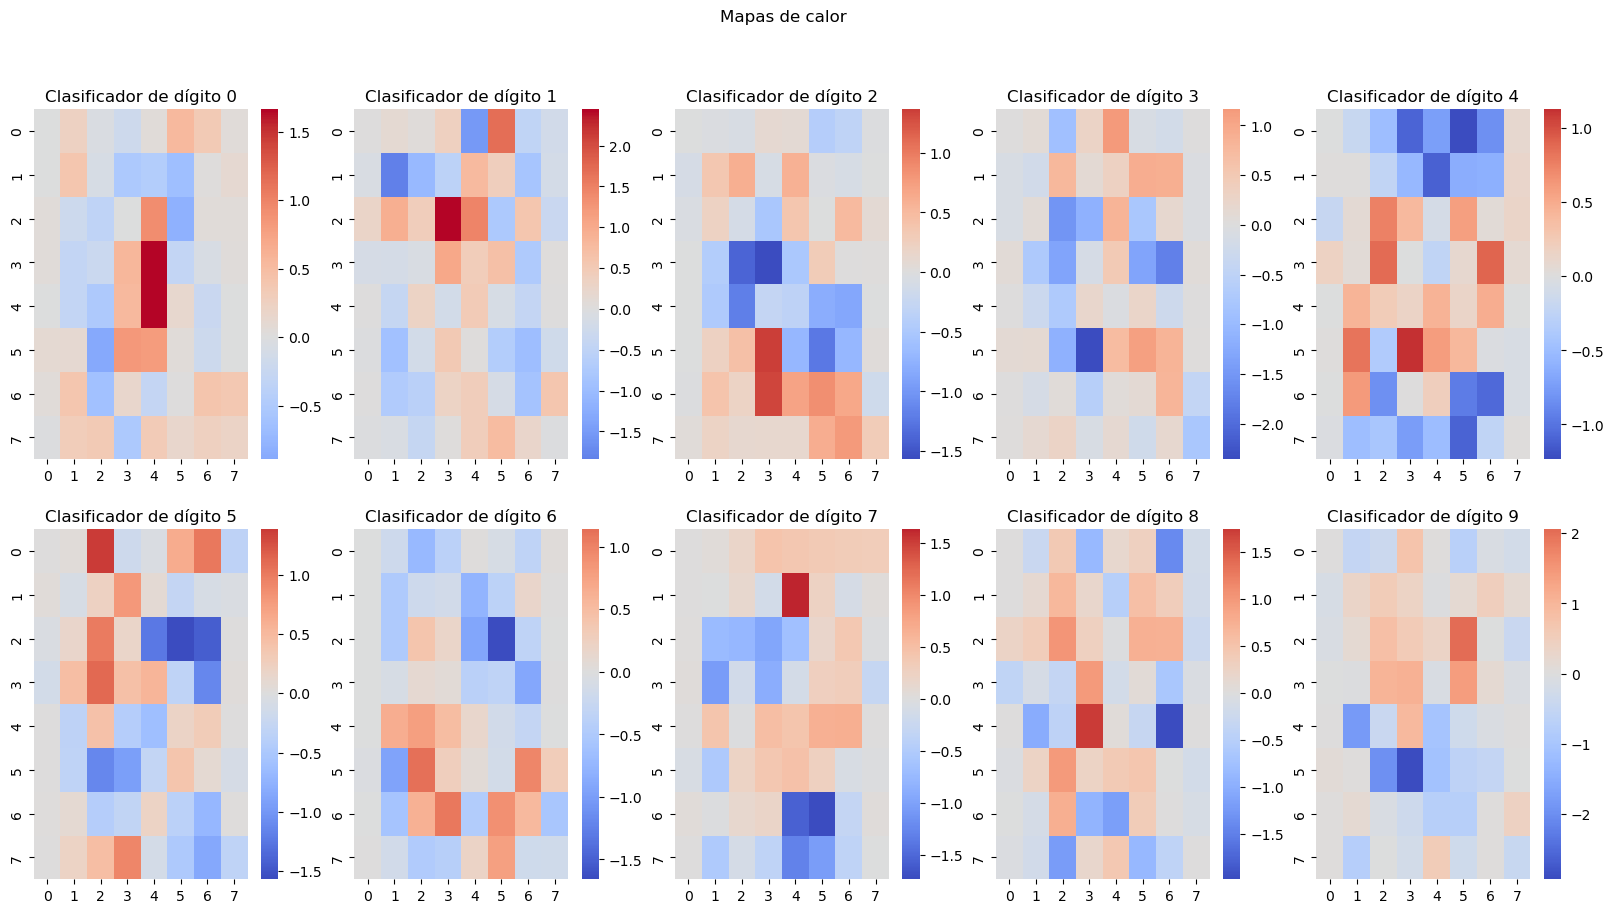

In [42]:
def plot_heatmap(models):
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
    fig.suptitle('Mapas de calor')
    for i in range(2): 
        for j in range(5):
            if(i==0):
                weights = models[j].coef_.reshape(8, 8)  # Reorganizar en matriz 8x8
                sns.heatmap(weights, ax=axs[i, j], annot=False, cmap='coolwarm', center=0)
                axs[i, j].set_title(f'Clasificador de dígito {j}', fontsize=12)
            else:
                weights = models[j+5].coef_.reshape(8, 8)
                sns.heatmap(weights, ax=axs[i, j], annot=False, cmap='coolwarm', center=0)
                axs[i, j].set_title(f'Clasificador de dígito {j+5}', fontsize=12)
    plt.show()
    
plot_heatmap(models=models)

### Análisis de rendimiento para cada clasificador

A continuación se presenta el promedio de exactitud obtenido por cada clasificador al probarlos con el set de datos de prueba. 

In [189]:
real_scores = []
local_scores = []

for i in enumerate(models):
    real_scores.append(i[1].score(X_test, y_test)) 
    local_scores.append(i[1].score(X_test, y_tests[i[0]]))

global_scores = np.vstack((real_scores, local_scores))

pd.DataFrame(global_scores, index=['Y test with real values', 'Y test with manipulated values'], columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

,0,1,2,3,4,5,6,7,8,9
Y test with real values,0.166667,0.169444,0.183333,0.180556,0.219444,0.211111,0.186111,0.183333,0.158333,0.186111
Y test with manipulated values,0.997222,0.988889,0.994444,0.988889,1.000000,0.983333,0.997222,0.997222,0.969444,0.975000


A partir de la tabla anterior se pueden hacer las siguientes observaciones:

* La primera fila representa la exactitud que han tenido cada uno de los clasificadores al clasificar los datos reales con las clases '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'. Como se puede observar ninguno de los clasificadores obtiene un porcentaje mayor al 20% de exactitud, y esto es esperado dado que cada uno de ellos está entrenado para identificar un dígito en específico mientras que los demás dígitos los clasificará en una clase diferente a la del dígito en cuestión por lo cual falla al identificar los demás dígitos diferentes a la clase conocida.
* La segunda fila representa la exactitud que han tenido los clasificadores cuando se le pasan datos con solo dos clases, la del dígito en cuestión y la otra que será utilizada para clasificar dígitos distintos al conocido. Como se puede observar, en este caso obtienen resultados cercanos al 100% de exactitud.

### Regresión logística OVR

A continuación se pasa un único dígito como prueba a través de los 10 clasificadores entrenados para obtener las probabilidades de estos. Tomando en cuenta el criterio one versus rest, la salida a escoger debe ser aquella que obtenga la mayor probabilidad por lo cual el dígito corresponderá a aquel clasificador que obtenga la mayor probabilidad.

Si desea cambiar el dígito a probar puede modificar el valor de la variable 'digit' por la posición en un rango de 0 a 1796 que corresponde a la cantidad de muestras en el set de datos.

In [43]:
digit = 1796  # Change the number to see the probabilities of a different number

test_number = standarized_digits[digit] 
print(f'Número de prueba: {y[digit]}')

def ovr(models, sample_digit):
    probabilities = np.zeros([10,1])

    for i in range(0,10):
        if(i == 0):
            probabilities[i] = models[i].predict_proba(sample_digit.reshape(1, -1))[0,0]
        else:
            probabilities[i] = models[i].predict_proba(sample_digit.reshape(1, -1))[0,1]

    prediction = np.argmax(probabilities)
    
    return probabilities, prediction

probabilities, prediction = ovr(models=models, sample_digit=test_number)
print('Predicción: ', prediction)

df = pd.DataFrame(probabilities, columns=['Probabilidad'], index=[f'{i}' for i in range(10)])
df.head(10)

Número de prueba: 8
Predicción:  8


,Probabilidad
0,2.717069e-06
1,1.887273e-06
2,1.702026e-04
3,7.218713e-06
4,1.095229e-04
5,7.913419e-05
6,5.259959e-04
7,6.726682e-08
8,9.501781e-01
9,3.102481e-03


In [44]:
def ovr_predict(X_test, models):
    predictions = np.zeros(X_test.shape[0], dtype=int)

    for i in range(X_test.shape[0]):
        probabilities, prediction = ovr(models=models, sample_digit=X_test[i])
        predictions[i] = int(prediction)
    
    return predictions

print(
    f"Classification report for ovr classifier:\n"
    f"{classification_report(y_test,ovr_predict(X_test=X_test, models=models))}\n"
)

Classification report for ovr classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.93      0.93      0.93        30
           9       0.93      0.93      0.93        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360




### Clasificador Multinomial

In [45]:
# Librerias a utilizar para el clasificador multinomial
from sklearn.linear_model import LogisticRegression

In [46]:
multi = LogisticRegression()
multi.fit(X_train,y_train)

LogisticRegression()

In [47]:
multi_pred = multi.predict(X_test)
multi_matrix = confusion_matrix(y_test,multi_pred)
print(
    f"Classification report for classifier multinomial classification:\n"
    f"{classification_report(y_test,multi_pred)}\n"
)

Classification report for classifier multinomial classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360




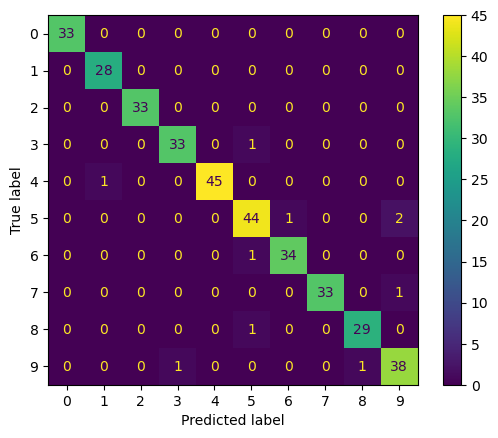

In [48]:
disp_mult = ConfusionMatrixDisplay(confusion_matrix=multi_matrix,display_labels=knn.classes_)
disp_mult.plot()

## Análisis comparativo entre los diferentes clasificadores

1. ¿Qué influencia tiene el uso de diferentes valores de K en el clasificador KNN?

        El uso de diferentes valores de K, afecta la cantidad de vecinos que son consultados antes de seleccionar a que clase asignar un elemento, lo que termina afectando la exactitud con que el modelo puede llegar a predicir a que clase asignar un elemento, además de añadir un poco más de tiempo de comparación, sin embargo permite obtener mejores resultados que no se vean afectados por ruido o valores outliers
 
2. ¿Qué diferencias hay entre el clasificador utilizando KNN y regresión logística? ¿Funciona uno mejor que otro?, ¿Porqué?

        Las diferencias observadas entre KNN y regresión logística, son el hecho de que KNN permite un nivel más alto de personalización y con mayor profundidad debido a los múltiples hyperpárametros que pueden ser especificados, sin embargo esto presenta un costo mayor de tiempo y recursos, ya que se requiere que el modelo sea ejecutado múltiples veces evaluando los resultados obtenidos con una serie de hyper párametros especifica. Además KNN funciona mejor mientras menor sea la dimensionalidad de los datos, al utilizar distancias como la euclidea, la cual va perdiendo su precisión mientras más dimensiones poseen los datos.

        Regresión logistica, por su parte, no sufre tan fácilmente de esto al emplear la función de sigmoide y trabajar con probabilidades, lo que permite predecir a que clase pertenecerá un valor según la probabilidad obtenida, lo que le da mayor rapidez de desempeño al no tener que necesitar un cache o memoria a la mano extensivo de cada punto, o de la cantidad de puntos especificados, para comparar como hace KNN. Sin embargo, necesita que el problema sea lineal para funcionar mejor, cosa que KNN no.

        Respecto a su funcionamiento [...] Al comparar KNN con regresión logística multinomial, para este caso el rendimiento es muy similar, la diferencia en accuracy promedio al observar los reportes de clasificación es de 0.01 de diferencia lo que da permite concluir que no necesariamente en la escala macro. Al observar las matrices de confusión, podemos observar que fallan en dígitos diferentes, sin embargo son igualmente errores minimos, de 1 o 2 valores clasificados de forma erronéa. En conclusión, si bien KNN llega a tener un mejor desempeño que la clasificación multinomial, es marginal su mejora.
3. ¿El clasificador de regresión logistica presenta un buen rendimiento? ¿Cómo evaluan su rendimiento?¿Si el rendimiento no es bueno que cree se debe hacer para mejorarlo?
        
        Los diez clasificadores presentaron un buen rendimiento como se puede observar en las métricas obtenidas a partir de la predicción de datos de prueba que concordaban con las clases con las que fueron entrenados, sin embargo, cuando se utilizaron datos distintos a con los que fueron entrenados (clases que no conocían) estos presentaron un rendimiento menor al 20% lo cual es de esperarse ya que cada clasificador ha sido entrenado para identificar un dígito en específico y los demás los clasificará como '0' o '1' en el caso del clasificador del dígito 0.

        Luego, al utilizar 'ovr' (one versus rest) para poder clasificar un dígito basado en la mayor probabilidad obtenida de los 10 clasificadores podemos observar que el dígito es clasificado exitosamente, además de que la exactitud para clasificar dígitos en cada una de las 10 clases es en la mayoría de los casos cercana al 100%.

4. Al realizar el mapa de calor con los pesos de la regresión logística, para los diferentes clasificadores, ¿Qué puede notar? ¿Hay algun tipo de patrón?, ¿Sí, no, porqué?

        Sí, existe un patrón que se repite en los diez cladificadores: los bordes tienen un peso de valor 0 lo cual indica que los pixeles de los bordes tuvieron muy poca o nada de importancia para discernir el dígito en cuestión. Además, se observa que los pixeles que tuvieron más importancia (los que tienen colores más fuertes como rojo y azul) son aquellos que se encontraban entre los espacios vacíos y el contorno de los dígitos; por ejemplo, en el dígito 0, los pixeles con mayor relevancia fueron aquellos que se encontraban en la zona interior del dígito, es decir aquellos que no representan como tal la forma del dígito si no el espacio que crea este en su interior.
5. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de clasificación y como se aplicó en este proyecto.-yo

## Regresión Lineal

In [171]:
# Loading the regression data
data = pd.read_csv('RegressionData.csv')

# Displaying the first 5 rows of the data
data.head(5)

,X1,X2,y
0,53.766714,1.347397,0.594013
1,183.388501,-1.338226,0.505659
2,-225.884686,-0.800645,0.253316
3,86.217332,-1.343605,0.453381
4,31.876524,1.151258,1.720519
